<a href="https://colab.research.google.com/github/mcalmeida13/math-machine-learning/blob/main/logistic-regression/xor-problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

References
https://dev.to/jbahire/demystifying-the-xor-problem-1blk

In [2]:
N = 4
D = 2

In [3]:
# XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

In [4]:
T = np.array([0, 1, 1, 0])

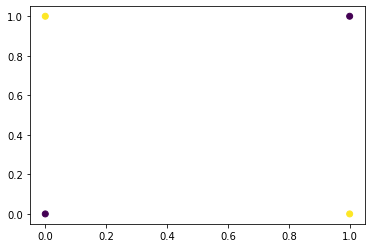

In [6]:
plt.scatter(X[:,0],X[:,1],c=T)
plt.show()

In [7]:
ones = np.ones((N, 1))

In [20]:
# Let's see the problem in a 3d perspective
# with this trick, our problem is linearly separable
# add a column of xy = x*y
xy = (X[:,0] * X[:,1]).reshape(N, 1)
Xb = np.concatenate((ones, xy, X), axis=1)

In [21]:
# randomly initialize the weights
w = np.random.randn(D + 2)

# calculate the model output
z = Xb.dot(w)

In [22]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [23]:
Y = sigmoid(z)

In [24]:
Y

array([0.7282953 , 0.86007152, 0.63430354, 0.85123296])

In [25]:
# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [26]:
# let's do gradient descent 100 times
learning_rate = 0.01
error = []
for i in range(10000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 1000 == 0:
        print(e)

    # gradient descent weight udpate with regularization
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.01*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

3.814380551610918
1.7120013853748746
1.2332180849479901
0.9792153316569614
0.8305630819338894
0.7371040109713743
0.6752296008379712
0.632709304548285
0.6026848536796656
0.5810563689107275


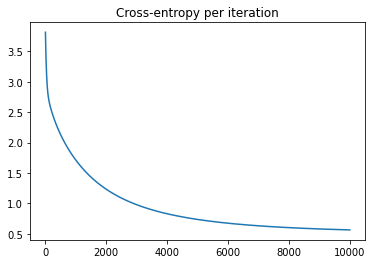

In [27]:
plt.plot(error)
plt.title("Cross-entropy per iteration")
plt.show()

In [28]:
print("Final w:", w)
print("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)

Final w: [-1.49003514 -7.70103894  3.4208823   3.42088243]
Final classification rate: 1.0
